### 신경망 데이터 표현
- 텐서(tensor)
    - 다차원 넘파이 배열
    - 데이터를 위한 컨테이너(container), 숫자를 주로 다룸
    - 임의의 차원 개수를 가지는 행렬의 일반화된 모습 (차원(dimension)을 종종 축(axis)라고 부름)

#### 스칼라(0D 텐서)
- 하나의 숫자만 담고 있는 텐서
- 스칼라 텐서, 0차원 텐서, 0D 텐서라고 부름
- float32나 float64 타입의 숫자가 스칼라 텐서 (또는 배열 스칼라(array scalar))
- 축 개수는 0 (ndim = 0), 텐서의 축 개수를 랭크(rank)라고 부름

In [2]:
import numpy as np
x = np.array(12)
print(x)      # 스칼라 텐서
print(x.ndim) # 축(랭크) 개수

12
0


#### 벡터(1D 텐서)
- 숫자의 배열
- 딱 하나의 축을 가짐

In [3]:
x = np.array([12,3,6,14,7])
print(x)     
print(x.ndim)

[12  3  6 14  7]
1


- 이 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름
- 5D 벡터와 5D 텐서 혼동주의!
- 차원수(dimensionality)는 특정 축을 따라 놓인 원소의 개수이거나 텐서의 축 개수를 의미

#### 행렬(2D 텐서)
- 벡터의 배열이 행렬(matrix)
- 행렬에는 2개의 축(행(row), 열(column))
- 숫자가 채워진 사각 격자

In [4]:
x = np.array([[5,48,2,43,0],
             [6,29,2,53,1],
             [7,80,4,36,2]])
x.ndim

2

- 첫번째 축에 놓여있는 원소를 행 이라 부름
- 두번째 축에 놓여있는 원소를 열 이라 부름
- x의 첫번째 행은 [5,48,2,43,0], 첫번째 열은 [5,6,7]

#### 3D 텐서와 고차원 텐서
- 행렬들을 하나의 새로운 배열로 합치면 3D 텐서가 만들어짐

In [5]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
               [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
               [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]]]) 
x.ndim

3

- 3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐
- 딥러닝에서는 보통 0D ~ 4D 까지의 텐서를 다룸
- 동영상을 다룰 경우에는 5D 텐서까지 가기도 함

#### 핵심속성
- 텐서는 3개의 핵심 속성
    - 축 개수(랭크) : 3D 텐서에는 3개의 축, 행렬에는 2개의 축, array.ndim 으로 확인
    - 크기(shaep) : 각 축에 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple)
        - 행렬의 경우 (3,5), 3D 텐서의 크기는 (3, 3, 5)
        - 벡터의 크기는 (5,) 처럼 1개의 원소로 이루어진 튜플
        - 배열 스칼라는 0처럼 크기가 없음
    - 데이터 타입(dtype) : 텐서에 포함된 데이터의 타입
        - float32, float64, uint8 등
        - 드물게 cha 타입 사용
        - 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하므로
        - 넘파이 배열은 가변 길이의 문자열을 지원하지 않음

3
(60000, 28, 28)
uint8


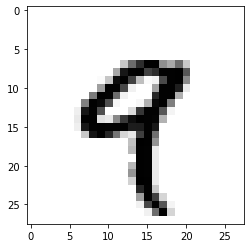

In [6]:
# 구체적으로 확인
# mnist 데이터셋 불러오기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images 배열의 ndim 속성으로 축 개수 확인
print(train_images.ndim) # 3

# 배열의 크기
print(train_images.shape) # (60000, 28, 28)

# dtype로 데이터 타입 확인
print(train_images.dtype) # uint8

# 이 배열은 정수형 3D 텐서 (28*28 크기의 행렬 6만개가 있는 배열)
# 각 행렬은 하나의 흑백 이미지
# 행렬의 각 원소는 0에서 255사이의 값을 가짐

# 다섯번째 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(train_images[4], cmap=plt.cm.binary)
plt.show()

#### 넘파이로 텐서 조작하기
- 배열에 있는 특정 원소들을 선택하는 것이 슬라이싱(slicing)이라고 함

In [7]:
# 11번째에서 100번째까지 숫자를 선택하여 (90,28,28)크기의 배열 만들기
my_slice = train_images[10:100]
print(my_slice.shape) # (90, 28, 28)

# 더 자세한 표기법
# 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스 지정
my_slice = train_images[10:100, :, :]
print(my_slice.shape) # (90, 28, 28)

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape) # (90, 28, 28)

# 각 배열의 축을 따라 어떤 인덱스 사이도 선택 가능
# 14x14픽셀을 선택하려면 아래와 같이
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape) # (60000, 14, 14)

# 음수 인덱스도 사용 가능
# 현재 축의 끝에서 상대적인 위치를 나타냄
# 정중앙에 위치한 14x14 픽셀 조각 잘라내기
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape) # (60000, 14, 14)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)
(60000, 14, 14)
(60000, 14, 14)


#### 배치 데이터
- 딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축(인덱스 0번째 축)은 샘플 축(sample axis)
- 샘플 차원(sample dimension)이라고도 부름
- 딥러닝 모델은 한번에 전체 데이터셋을 처리하지 않음
- 대신 작은 배치(batch)로 나눔

In [8]:
# mnist 숫자 데이터에서 크기가 128인 배치 하나
batch = train_images[:128]

# 그 다음 배치
batch = train_images[128:256]

# n번째 배치
# batch = train_images[128 * n : 128 * (n+1)]

- 배치 데이터를 다룰 때는 첫번째 축(0번째)을 배치 축(batch axis) 또는 배치차원(batch dimension)이라 부름

#### 텐서 실제 사례
- 우리가 사용할 데이터는 대부분 다음 중 하나
    - 벡터 데이터 : (samples, teatures) 크기의 2D 텐서
    - 시계열 데이터 or 시퀀스 데이터 : (samples, timesteps, features) 크기의 3D 텐서
    - 이미지 : (samples, height, width, channels) 또는 (sample, channels, height, width) 크기의 4D 텐서
    - 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

#### 벡터 데이터
- 대부분의 경우에 해당
- 하나의 데이터 포인트가 벡터로 인코딩 될 수 있으므로 배치 데이터는 2D 텐서로 인코딩 될 것(벡터의 배열)
- 첫번째 축은 샘플 축, 두번째 축은 특성 축(feature axis)
- 예시)1
    - 사람의 나이, 우편 번호, 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성되고
    - 10만 명이 포함된 전체 데이터 셋은 (100000,3) 크기의 텐서에 저장됨

#### 시계열 데이터 또는 시퀀스 데이터
- 데이터에서 시간이(또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 3D 텐서로 저장
- 각 샘플은 벡터의 시퀀스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩 될 것
- <img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/068.jpg?w=300&h=151' width ='40%' height='40%'/>
- 관례적으로 시간 축은 항상 두번째 축(인덱스가 1인 축)임
- 예시
    - 주식 가격 데이터셋 : 1분마다 현재 주식 가격, 지난 1분동안 최고가격과 최소가격 저장
    - 1분마다 데이터는 3D 벡터로 인코딩되고 하루동안의 거래는 (390,3) 크기의 2D 텐서로 인코딩
    - 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장

#### 이미지 데이터
- 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어짐
- 흑백 이미지의 경우 컬러 채널의 차원 크기 1
- 256x256 크기의 흑백 이미지에 대한 128개 배치는 (128, 256, 256, 1)크기의 텐서에 저장
- 컬러 이미지에 대한 128개의 배치라면 (128, 256, 256, 3) 크기의 텐서에 저장 될 수 있음
- <img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/069.jpg?w=300&h=287' width ='40%' height='40%'/>
- 이미지 텐서의 크기를 지정하는 방식은 두가지
- 텐서플로에서 사용하는 채널 마지막(channel-last)방식과 씨아노에서 사용하는 채널 우선(channel-firts)
- 구글의 텐서플로 머신러닝 프레임워크는 (samples, height, width, color_depth)처럼 컬러 채널의 깊이를 끝에
- 씨아노는 (samples, color_depth, height, width)처럼 컬러 채널의 깊이를 배치 축 바로 뒤에
- 케라스 프레임워크는 두 형식 모두 지원

#### 비디오 데이터
- 현실에서 5D 텐서가 필요한 몇 안되는 데이터 중 하나
- 하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지
- 프레임이 (height, width, color_depth)의 3D 텐서로 저장될 수 있기 때문에
- 프레임의 연속은 (frames, height, width, color_depth)의 4D 텐서로 저장될 수 있음
- 여러 비디오의 배치는 (samples, frames, height, width, color_depth)의 5D 텐서로 저장
- 예시
    - 60초짜리 144x256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 됨
    - 이런 비디오 클립을 4개 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장

### 신경망의 톱니바퀴 : 텐서 연산
- 심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산으로 나타낼 수 있음
- ex) 텐서 덧셈, 턴서 곱셈
- 케라스 층은 다음과 같이 생성
    - keras.layers.Dense(512, activation='relu')
    - 이 층은 2D 텐서를 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 2D 텐서를 반환하는 함수처럼 해석
    - 이 함수는 다음과 같음 (w는 2D 텐서, b는 벡터, 둘 다 층의 속성)
    - output = relu(dot(w, input) + b)
    - 3개의 텐서 연산
    - 입력 텐서와 텐서 W 사이의 점곱(dot), 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+), 마지막 relu연산
    - relu(x)는 max(x, 0)

#### 원소별 연산
- relu 함수와 덧셈은 원소별 연산(element-wise operation)
- 이 연산은 텐서에 있는 각 원소에 독립적으로 적용 = 고도의 병렬 구현이 가능한 연산

In [9]:
# 파이썬으로 단순한 원소별 연산을 구현한다면
def naive_relu(x):
    assert len(x.shape) == 2 # x는 2D 넘파이 배열
    x = x.copy()             # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

# 덧셈도 동일
def naive_relu(x):
    assert len(x.shape) == 2  # x와 y는 2D 넘파이 배열
    assert x.shape == y.shape
    
    x = x.copy()              # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

- 같은 원리로 원소별 곱셈, 뺄셈 등 가능
- 사실 넘파이 내장 함수로 연산 처리 가능
- 넘파이는 시스템에 설치된 BLAS(Basic Linear Algebra Subprogram) 구현에 복잡한 일들을 위임
- 넘파이는 원소별 연산을 엄청난 속도로 처리

#### 브로드캐스팅
- 덧셈 구현인 naive_add는 동일한 크기의 2D 텐서만 지원
- 크기가 다른 두 텐서를 더할 때 브로드캐스팅 사용
- 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅 됨
    1. 큰 텐서 ndim에 맞도록 작은 텐서에 축이 추가됨
    2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복
    3. 예시)
        - x의 크기는 (32,10)이고 y의 크기는 (10,)라고 가정
        - y에 비어있는 첫번째 축을 추가하여 (1,10)으로 만듬
        - 32번 반복하여 (32,10)이 됨
        - x와 y의 크기가 같으므로 더할 수 있음

#### 텐서 점곱
- 텐서 곱셈(tensor product)이라고도 부르는 점곱 연산은 가장 널리 사용되고 유용한 텐서 연산
- 원소별 연산과 반대로 입력 텐서의 원소들을 결합
- 넘파이, 케라스, 씨아노, 텐서플로에서 원소별 곱셈은 * 연산자 사용
- 넘파이와 케라스는 점곱 연산에 보편적인 dot 연산자 사용
- 두 벡터의 점곱은 스칼라가 되므로 원소 개수가 같은 벡터끼리 점곱이 가능
- 행렬 x와 벡터 y 사이에서도 점곱이 가능 => 벡터 반환
- 두 텐서 중 하나라도 ndim이 1보다 크면 dot 연산에 교환법칙이 성립되지 않음
- <img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/075.jpg?w=468&h=413' width ='40%' height='40%'/>
- x, y, z는 직사각형 모양으로 그려 있음(원소들이 채워진 박스라고 이해)
- x의 행 벡터와 y의 열 벡터가 같은 크기여야 하므로 자동으로 x의 너비와 y의 높이는 동일해야 함

#### 텐서 크기 변환(tensor reshaping)
- 텐서의 크기를 변환한다는 것은 특정 크기에 맞게 행과 열을 재배열한다는 뜻
- 당연히 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일

In [13]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

x = x.reshape((6, 1))
print(x)

x = x.reshape((2, 3))
print(x)

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0. 1. 2.]
 [3. 4. 5.]]


- 자주 사용하는 특별한 크기 변환은 전치(transposition)
- 행렬의 전치는 행과 열을 바꾸는 것, x[i, j] => x[j, i]

In [14]:
x = np.zeros((300, 20)) # 0으로 채워진 (300, 20) 크기의 행렬
x = np.transpose(x)
print(x.shape)

(20, 300)


#### 텐서 연산의 기하학적 해석
- 텐서 연산이 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석 가능
- 따라서 모든 텐서 연산은 기하하적 해석이 가능
- <img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/077_1.jpg?w=308&h=320' width ='40%' height='40%'/> <img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/077_2.jpg?w=309&h=320' width ='40%' height='40%'/>
- 이 포인트는 2D 공간에 있고 원점에서 포인트를 연결하는 화살표로 벡터를 나타냄
- <img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/078.jpg?w=300&h=276' width ='40%' height='40%'/>
- 새로운 포인트 B = [1, 0.25]를 이전 벡터에 더하기
- 기하학적으로 벡터 화살표를 연결하여 계산 가능
- 최종 위치는 두 벡터의 덧셈을 나타내는 벡터가 됨
- 
- 일반적으로 아핀변환, 회전, 스케일링 등 기본적인 기하학적 연산은 텐서 연산으로 표현 가능


#### 딥러닝의 기하학적 해석
- 신경망은 전체적으로 텐서 연산의 연결로 구성된 것
- 모든 텐서 연산은 입력데이터의 기하학적 변환임
- => 단순한 단계들이 이어져 구현된 신경망을 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것으로 해석

### 신경망의 엔진 : 그래디언트 기반 최적화
- 첫번째 신경망 예제에 있는 각 층은 입력 데이터를 다음과 같이 변환
- output = relu(dot(w, input) * b)
- 이 식에서 텐서 W와 b는 층의 속성
- 가중치(weight) 또는 훈련되는 파라미터(trainable parameter)라고 부름(각각 커널(kernel), 편향(bias)이라고도 함)
- 가중치에는 훈련 데이터를 신경망에 노출시켜서 학습된 정보가 담겨 있음

- 초기에는 가중치 행렬이 작은 난수로 채워져 있음(무작위 초기화(random initialization)단계)
- w와 b가 난수일 떄 output식이 유용한 어떤 표현을 만들 것이라 기대 안하지만 시작 단계
- 피드백 신호에 기초하여 가중치가 점진적인 조정 또는 훈련이 머신러닝의 핵심

- 훈련은 다음과 같은 훈련 루프(training loop) 안에서 필요한 만큼 반복
    1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출
    2. x를 사용하여 네트워크를 실행하고(정방향 패스(forward pass)단계), 예측 y_pred를 구함
    3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산
    4. 배치에 대한 손실이 조금 감소하도록 네트워크의 모든 가중치를 업데이트

- 결국 훈련 데이터에서 네트워크의 손실, 예측 y_pred와 타깃 y의 오차가 매우 작아질 것
- 이 네트워크는 입력에 정확한 타깃을 매핑하는 것을 학습
- 1단계는 그냥 입출력 코드, 2단계와 3단계는 몇개의 텐서 연산 적용
- 4단계에서 개별적인 가중치 값이 있을 때 증가해야 할지, 감소해야 할지, 얼마나 업데이트 해야할지 고민
    - 신경망에 사용된 모든 연산이 '미분가능'하다는 장점을 사용하여
    - 네트워크 가중치에 대한 손실의 그래디언트를 계산하는 것이 효과적인 방법
    - 그래디언트의 반대방향으로 가중치를 이동하면 손실이 감소

#### 변화율이란
- f(x) = y , 함수가 연속적이므로 x를 조금 바꾸면 y도 조금 변경됨 => 연속성의 개념
- x가 이동할 때, y의 변화량 => 기울기 => 변화율(derivative)
- <img src = 'https://tensorflowkorea.files.wordpress.com/2018/12/081.jpg?w=300&h=223' width ='40%' height='40%'/>
- 모든 미분 가능한 함수 f(x)에 대해 x의 값을 f의 국부적인 선형 근사인 그 지점의 기울기로 매핑하는 변화율 f'(x)가 존재
    - ex) cos(x)의 변화율은 -sin(x)이고, f(x)=a*x의 변화율은 f'(x)=a
- f(x)를 최소화하기 위해 x이동거리 만큼 x를 업데이트 하고 싶을 때, f의 변화율을 알고 있으면 해결
- 변화율 함수는 x가 바뀜에 따라 f(x)가 어떻게 바뀔지 설명해줌
- f(x)의 값을 감소시키고 싶다면 x를 변화율의 방향과 반대로 이동

#### 텐서 연산의 변화율 : 그래디언트
- 그래디언트는 텐서 연산의 변화율 : 텐서를 입력으로 받는 함수에 변화율 개념을 확장
- 입력 벡터 x, 행렬 w, 타깃 y와 손실함수 loss가 있다고 가정
- w를 사용하여 타깃의 예측 y_pred를 계산하고 손실, y_pred와 y의 오차를 계산할 수 있음
